## Process steps

1. data processing 
2. fix torch manual seed 
3. define model 
    3.1 you might need select the activation func, such as RELU. 
4. define loss function 
5. define optimizer (how much to tune the param)
6. training -> loop
    6.1 set optimizer gradiant not accumulate, reset every time 
    6.2 get loss value
    6.3 backward propagation 
    6.4 use step function to pass the data 



### Predict curves


In [11]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import helper_utils



In [12]:
# Combined dataset: bikes for short distances, cars for longer ones
distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

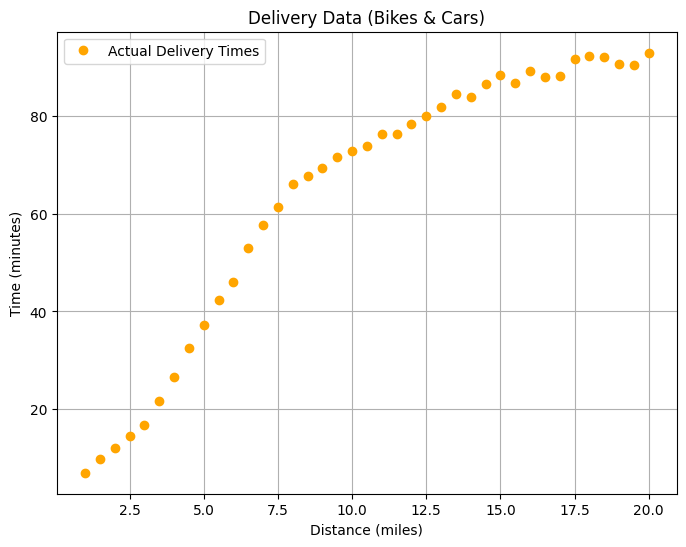

In [13]:
helper_utils.plot_data(distances, times)

In [14]:
# Data Standization
# get mean and standard deviation of the data
mean_distances =  distances.mean() 
mean_times = times.mean()

std_distances = distances.std()
std_times = times.std()


In [15]:
## data normalization 

norm_distances = (distances - mean_distances)/std_distances
norm_times = (times - mean_times)/std_times



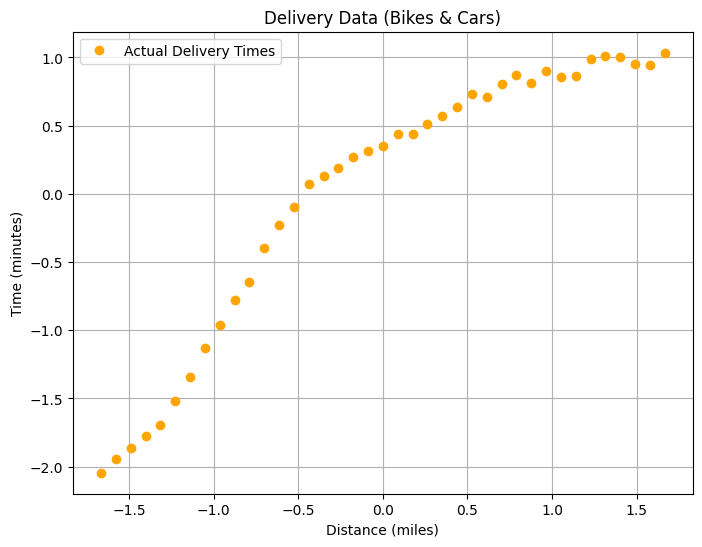

In [16]:
helper_utils.plot_data(norm_distances, norm_times)

In [17]:
torch.manual_seed(27)

In [18]:
model = (nn.Sequential(
    nn.Linear(1, 5), # 1 input 3 output , first hidden layer, 3 neuron 
    nn.ReLU(), #Rectified Linear Unit
    nn.Linear(5,1) # output layer, 3 input 1 ouput 
)
)

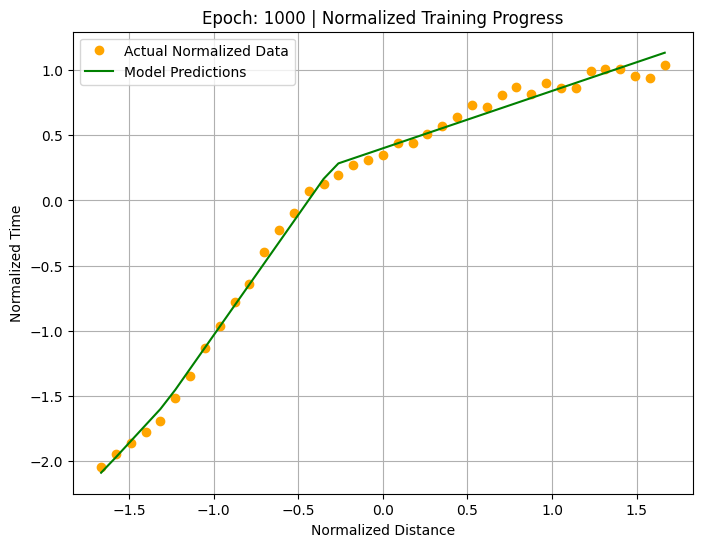


Training Complete.

Final Loss: 0.004046815913170576


In [ ]:
# Start training 

##1. define loss function 
loss_func   = nn.MSELoss()
##2. optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.01) # adjust weight and bias
##3. start loop 

for epoch in range (1000):
    optimizer.zero_grad() # gradient not accum
    outputs = model(norm_distances)
    loss = loss_func(outputs, norm_times) # compute loss
    loss.backward() # backpropagation, compute gradients
    optimizer.step() #update model parameters
    # Create a live plot every 50 epochs
    if (epoch + 1) % 50 == 0:
        helper_utils.plot_training_progress(
            epoch=epoch,
            loss=loss,
            model=model,
            distances_norm=norm_distances,
            times_norm=norm_times
        )
print("\nTraining Complete.")
print(f"\nFinal Loss: {loss.item()}")

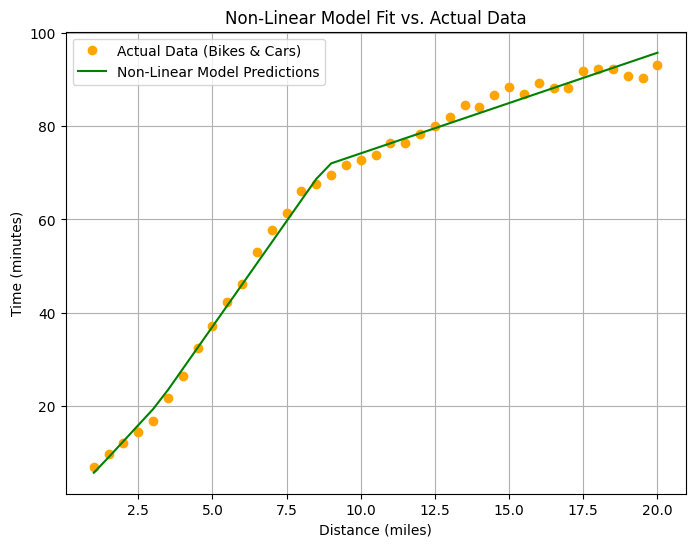

In [21]:
helper_utils.plot_final_fit(model, distances, times, norm_distances, std_times, mean_times)

In [22]:
# predict data

distance_to_predict = 5.1


with torch.no_grad(): 

    new_dis_tensor = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    new_dis_tensor_norm  = (new_dis_tensor - mean_distances)/std_distances

    # get predicted output 
    new_norm_time = model(new_dis_tensor_norm)

    ## get real time 

    real_predict_time = new_norm_time * std_times + mean_times

    ## print new time 

    print (f'prdiction for {distance_to_predict} will take {real_predict_time.item() :.1f} minutes')
    


prdiction for 5.1 will take 37.9 minutes
